In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_clean = pd.read_csv("customer_churn_clean.csv")

# Make sure churn is numeric 0/1
df_clean["churn"] = pd.to_numeric(df_clean["churn"], errors="coerce").astype("Int64")

QUICK BUSINESS CONTEXT METRICS

In [3]:
overall_churn_rate = df_clean["churn"].mean()
print(f"Overall churn rate: {overall_churn_rate:.2%}")
print("Rows:", df_clean.shape[0], "| Columns:", df_clean.shape[1])


Overall churn rate: 26.54%
Rows: 7043 | Columns: 21


Rows: 7043 | Columns: 21
Overall churn rate: 26.54%


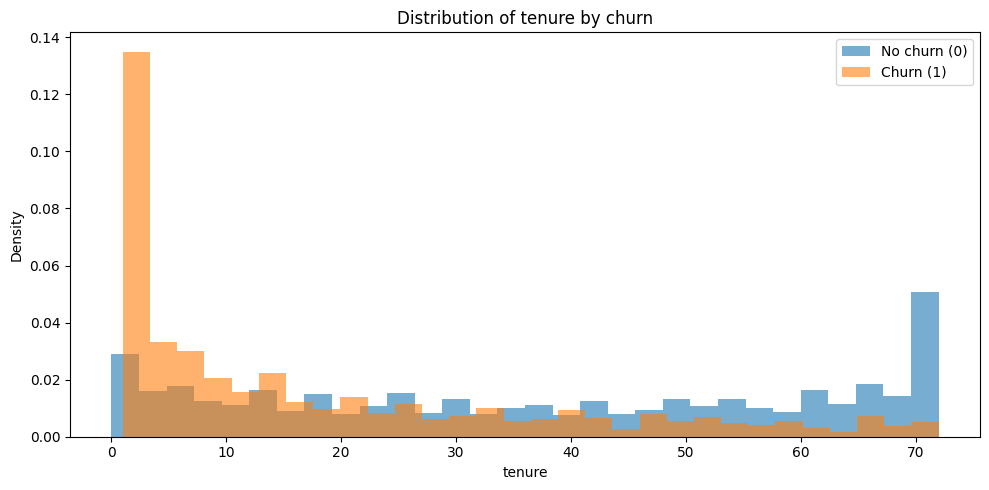

tenure mean (no churn): 37.57 | mean (churn): 17.98


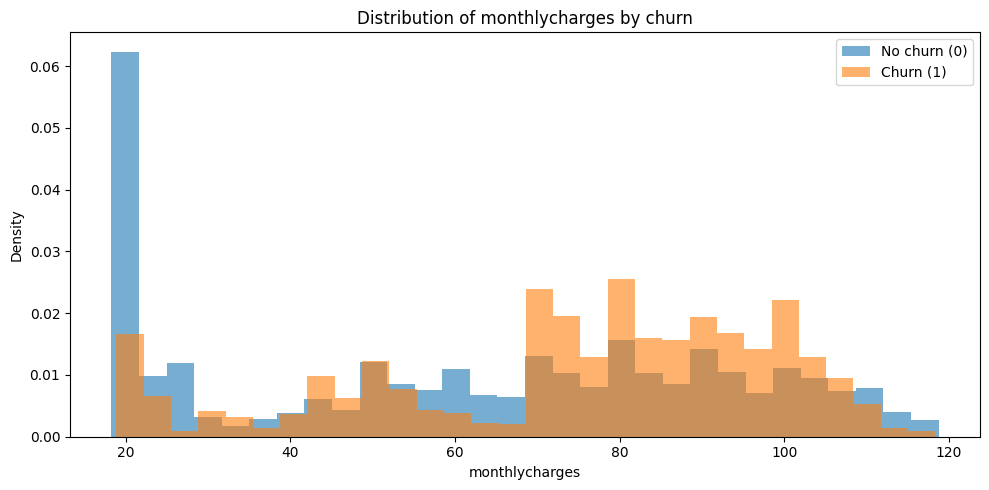

monthlycharges mean (no churn): 61.27 | mean (churn): 74.44


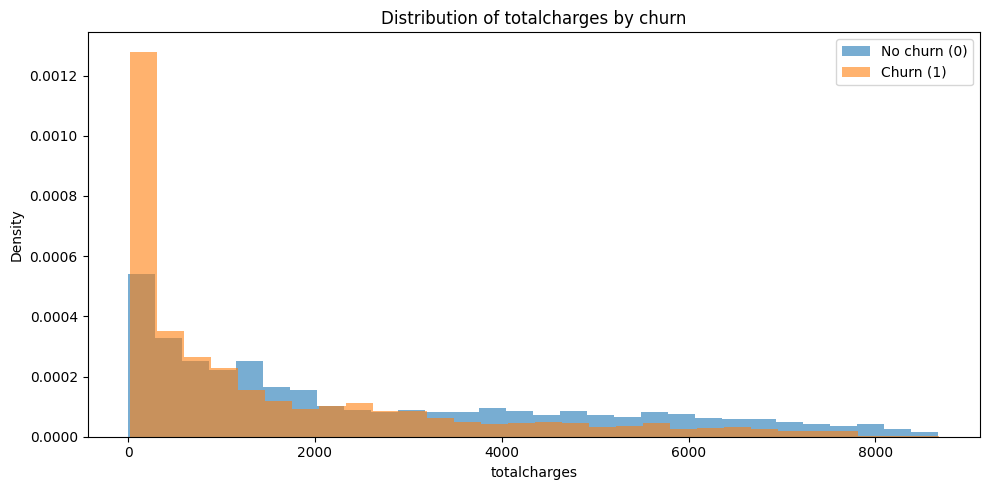

totalcharges mean (no churn): 2549.91 | mean (churn): 1531.80


/var/folders/d0/51lrq2bs29b460214r0kpfrm0000gn/T/ipykernel_12829/1324598448.py:36: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  g = tmp.groupby(col)["churn"]


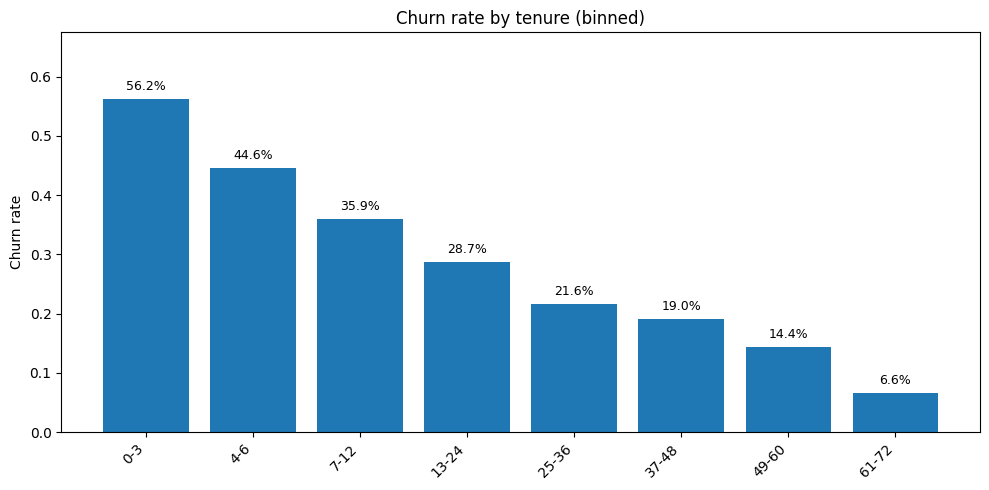

       customers  churn_rate_pct  churned
bin                                      
0-3         1062           56.21      597
4-6          419           44.63      187
7-12         705           35.89      253
13-24       1024           28.71      294
25-36        832           21.63      180
37-48        762           19.03      145
49-60        832           14.42      120
61-72       1407            6.61       93


/var/folders/d0/51lrq2bs29b460214r0kpfrm0000gn/T/ipykernel_12829/1324598448.py:36: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  g = tmp.groupby(col)["churn"]


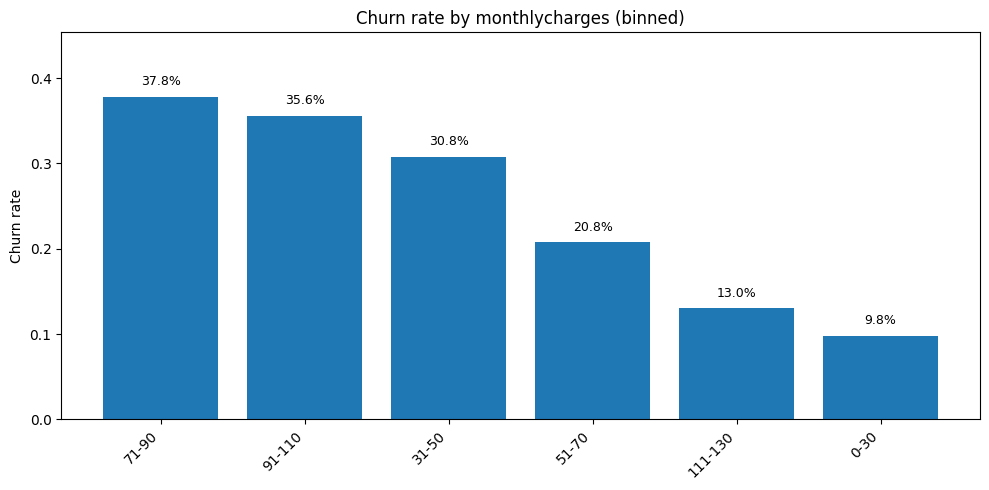

         customers  churn_rate_pct  churned
bin                                        
71-90         1844            37.8      697
91-110        1524           35.56      542
31-50          646            30.8      199
51-70         1161           20.76      241
111-130        215           13.02       28
0-30          1653             9.8      162


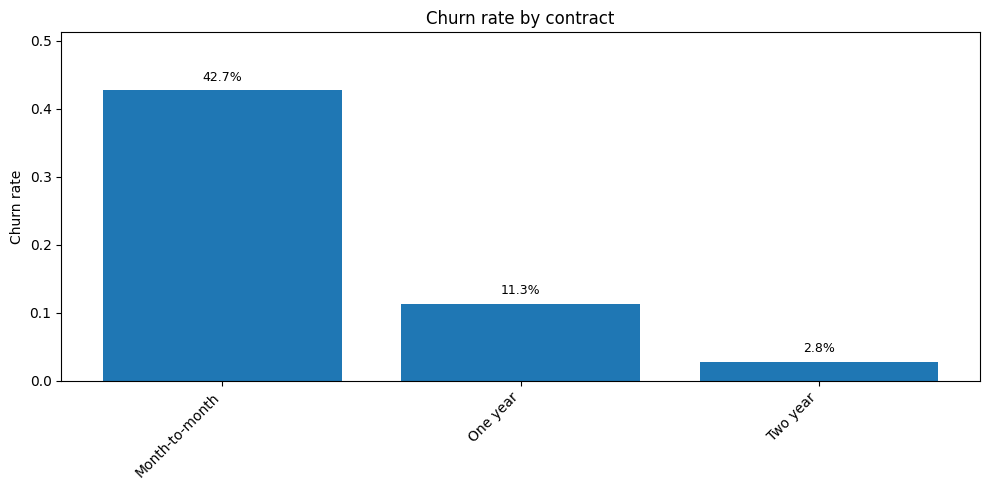

                customers  churn_rate_pct  churned
contract                                          
Month-to-month       3875           42.71     1655
One year             1473           11.27      166
Two year             1695            2.83       48


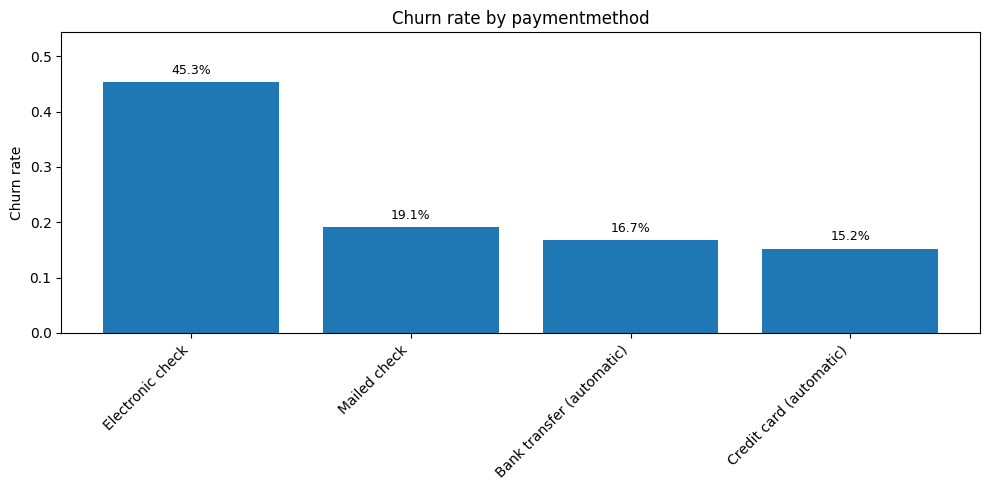

                           customers  churn_rate_pct  churned
paymentmethod                                                
Electronic check                2365           45.29     1071
Mailed check                    1612           19.11      308
Bank transfer (automatic)       1544           16.71      258
Credit card (automatic)         1522           15.24      232


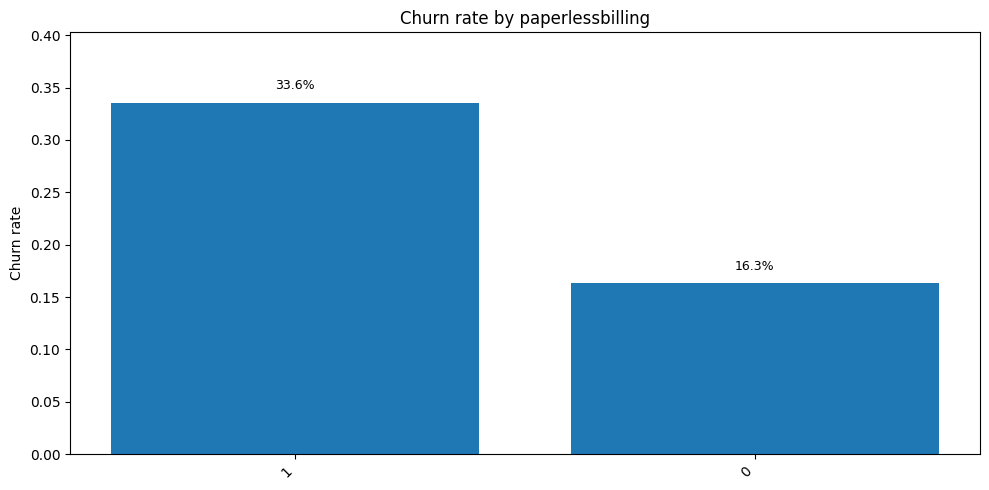

                  customers  churn_rate_pct  churned
paperlessbilling                                    
1                      4171           33.57     1400
0                      2872           16.33      469


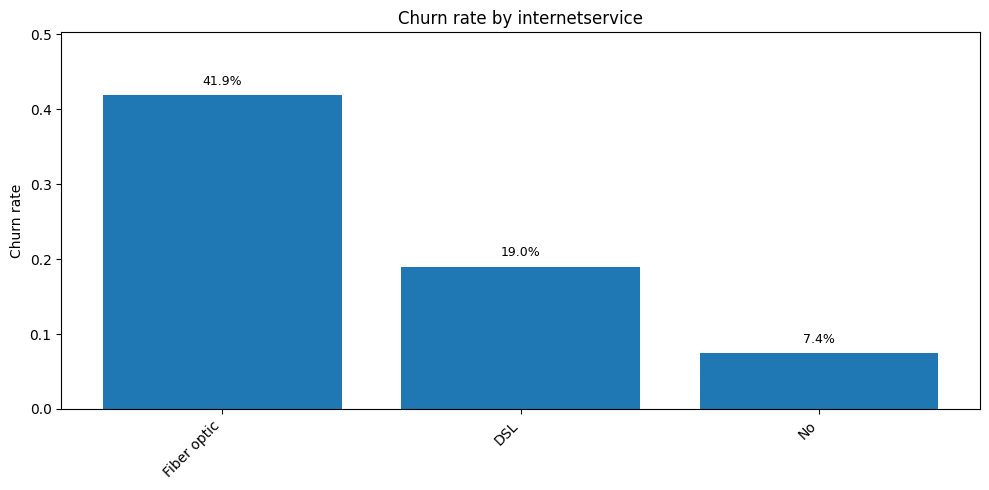

                 customers  churn_rate_pct  churned
internetservice                                    
Fiber optic           3096           41.89     1297
DSL                   2421           18.96      459
No                    1526             7.4      113


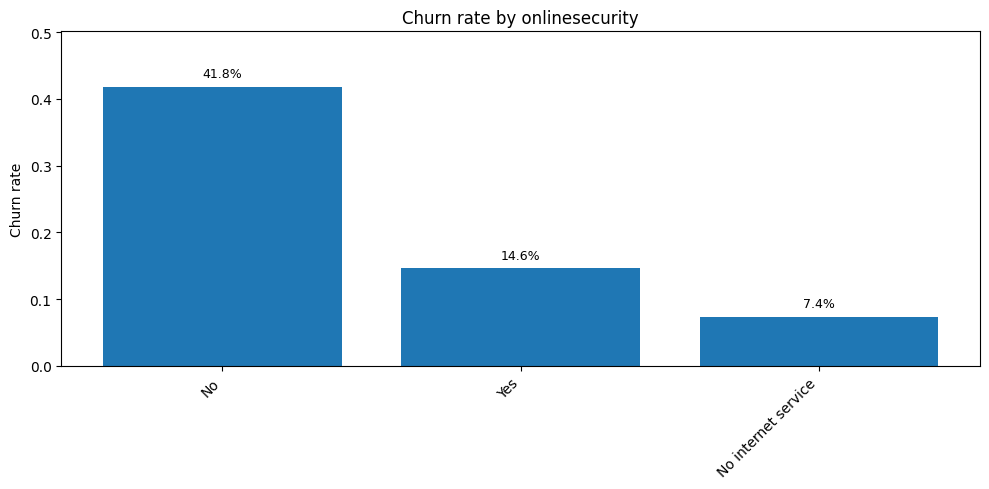

                     customers  churn_rate_pct  churned
onlinesecurity                                         
No                        3498           41.77     1461
Yes                       2019           14.61      295
No internet service       1526             7.4      113


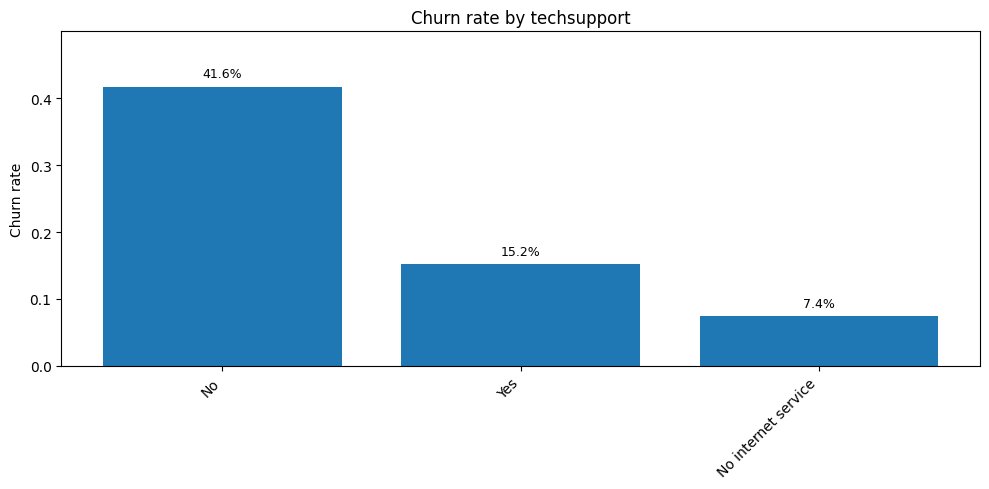

                     customers  churn_rate_pct  churned
techsupport                                            
No                        3473           41.64     1446
Yes                       2044           15.17      310
No internet service       1526             7.4      113


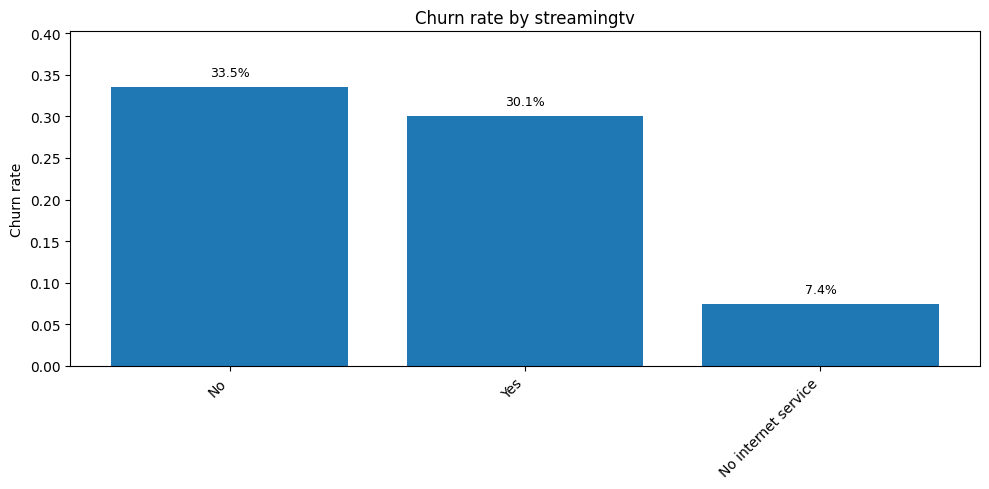

                     customers  churn_rate_pct  churned
streamingtv                                            
No                        2810           33.52      942
Yes                       2707           30.07      814
No internet service       1526             7.4      113


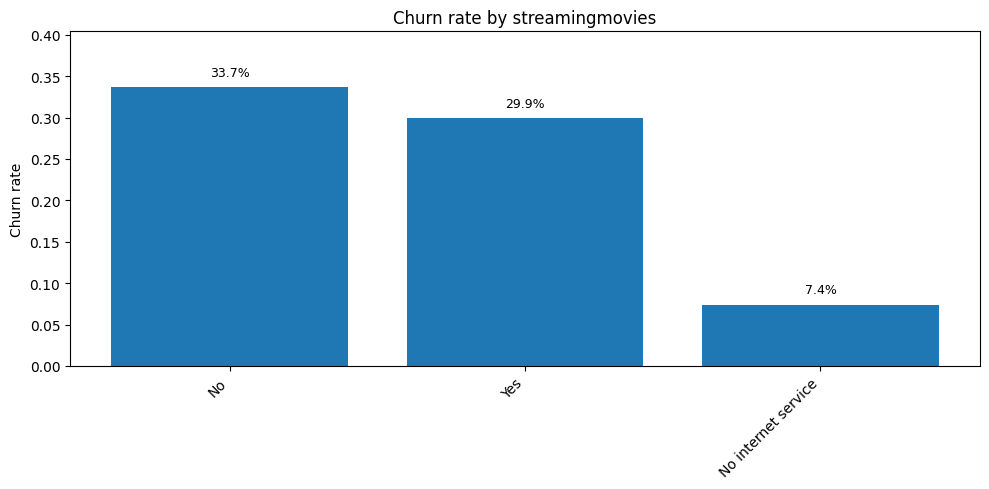

                     customers  churn_rate_pct  churned
streamingmovies                                        
No                        2785           33.68      938
Yes                       2732           29.94      818
No internet service       1526             7.4      113


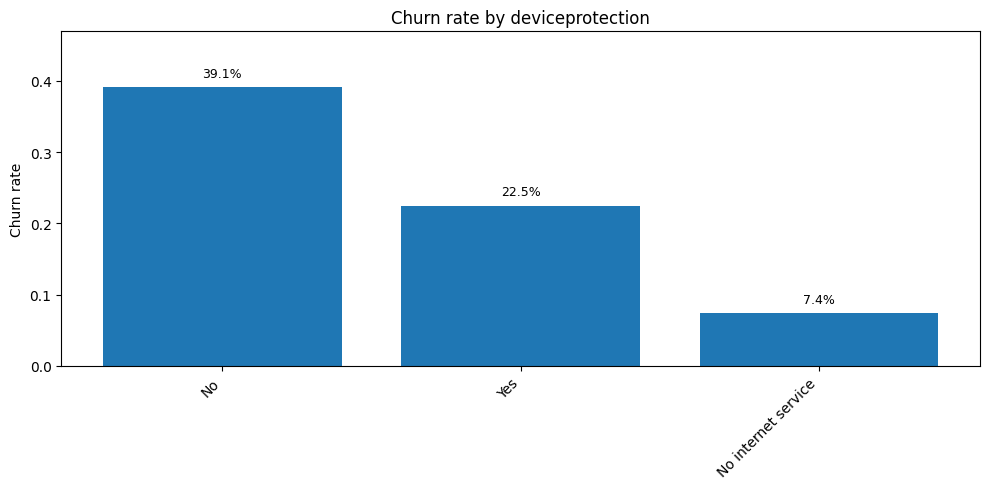

                     customers  churn_rate_pct  churned
deviceprotection                                       
No                        3095           39.13     1211
Yes                       2422            22.5      545
No internet service       1526             7.4      113


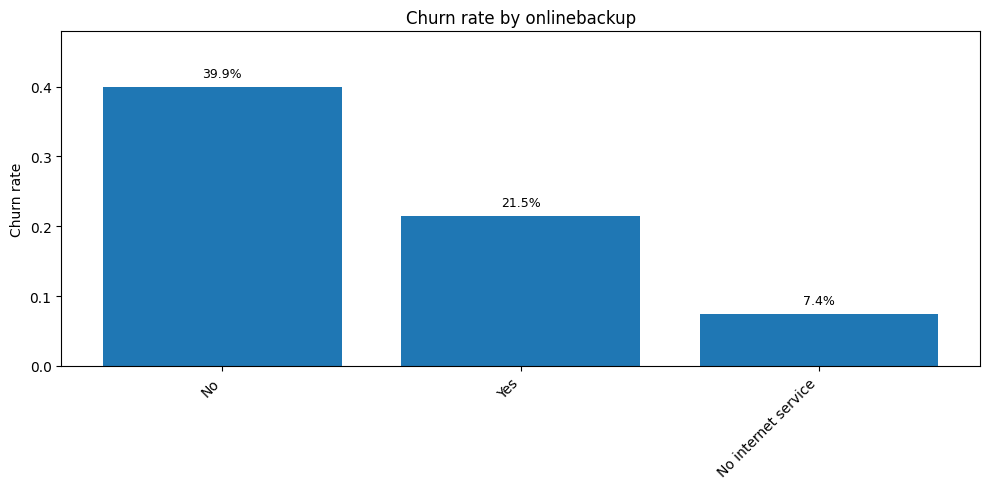

                     customers  churn_rate_pct  churned
onlinebackup                                           
No                        3088           39.93     1233
Yes                       2429           21.53      523
No internet service       1526             7.4      113


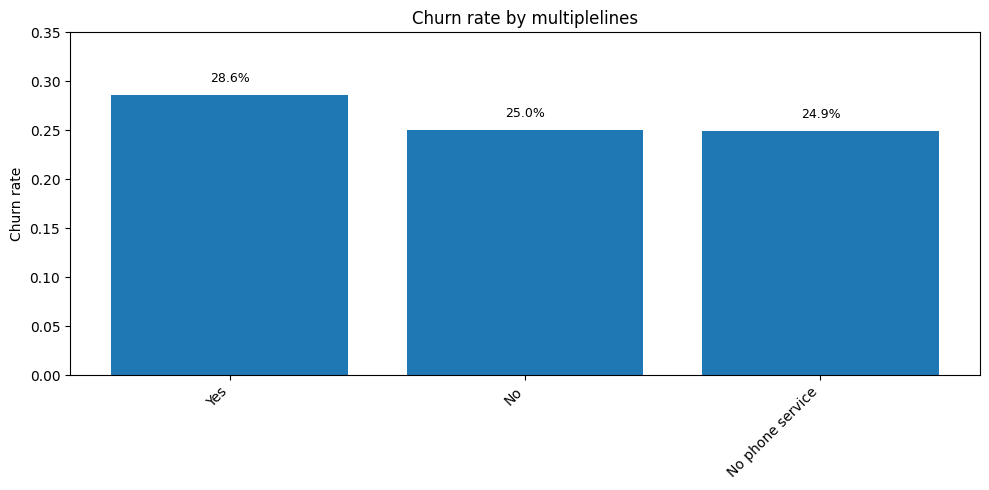

                  customers  churn_rate_pct  churned
multiplelines                                       
Yes                    2971           28.61      850
No                     3390           25.04      849
No phone service        682           24.93      170


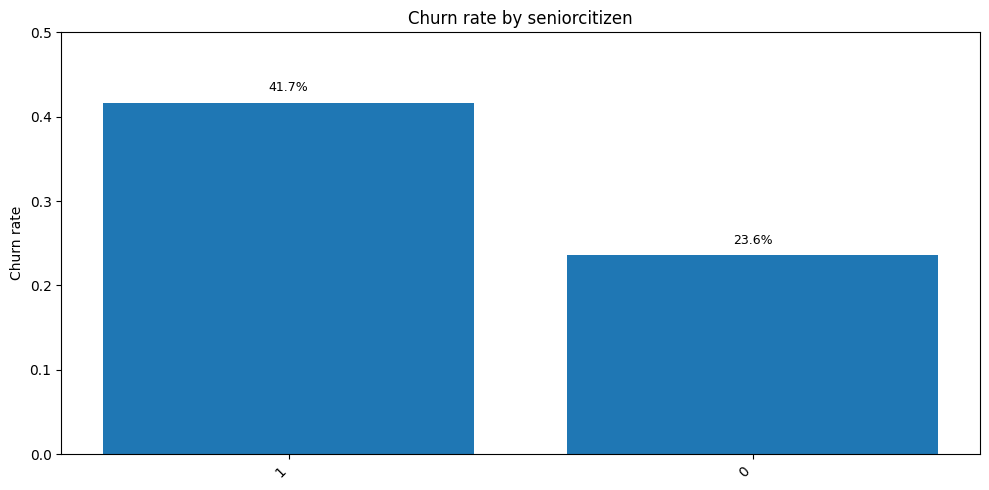

               customers  churn_rate_pct  churned
seniorcitizen                                    
1                   1142           41.68      476
0                   5901           23.61     1393


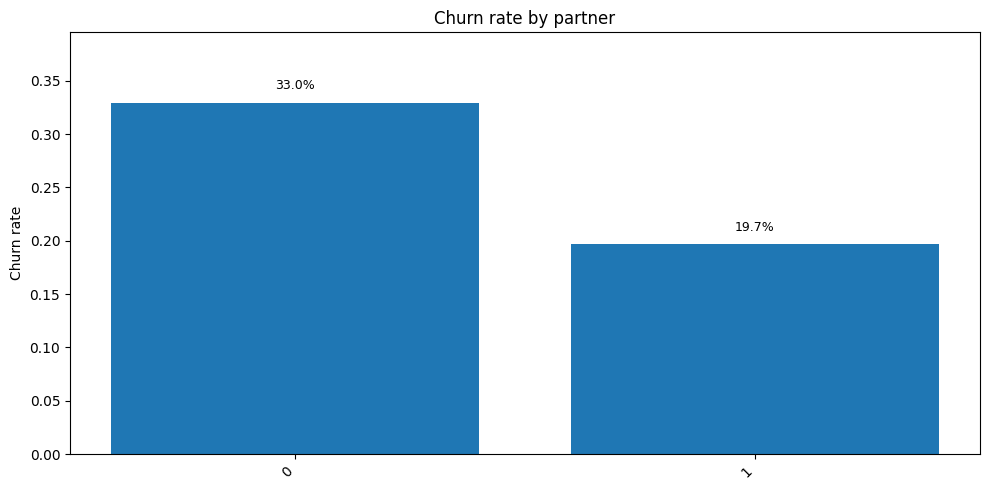

         customers  churn_rate_pct  churned
partner                                    
0             3641           32.96     1200
1             3402           19.66      669


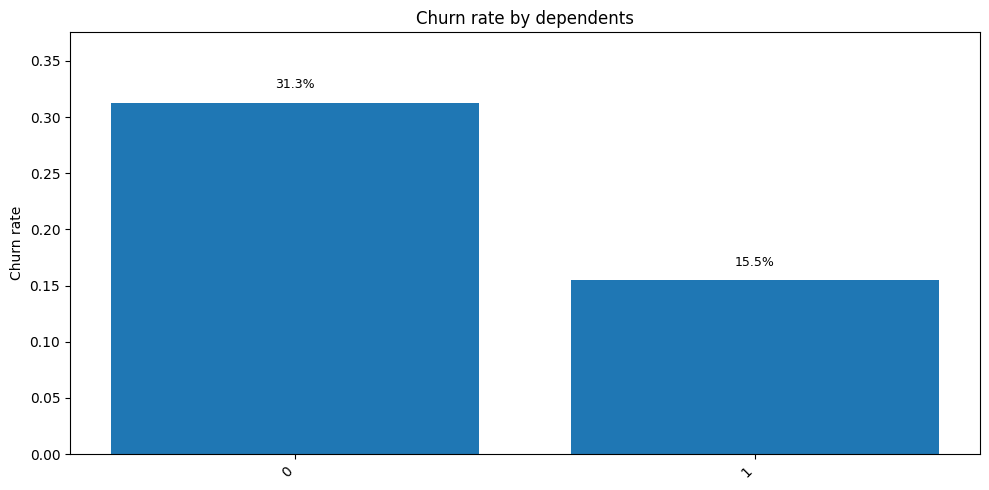

            customers  churn_rate_pct  churned
dependents                                    
0                4933           31.28     1543
1                2110           15.45      326


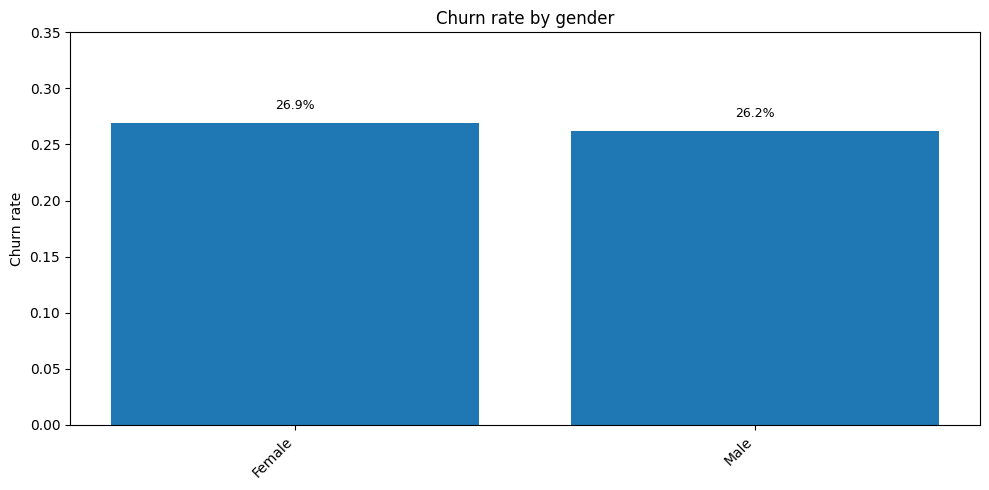

        customers  churn_rate_pct  churned
gender                                    
Female       3488           26.92      939
Male         3555           26.16      930


In [5]:

# IMPORTS

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from typing import Optional

plt.rcParams["figure.figsize"] = (10, 5)

# LOAD CLEAN DATASET

df_clean = pd.read_csv("customer_churn_clean.csv")

# Ensure churn is numeric 0/1
df_clean["churn"] = pd.to_numeric(df_clean["churn"], errors="coerce").astype("Int64")

print("Rows:", df_clean.shape[0], "| Columns:", df_clean.shape[1])
print("Overall churn rate:", f"{df_clean['churn'].mean():.2%}")



# HELPERS

def churn_rate_table_by_category(df: pd.DataFrame, col: str) -> pd.DataFrame:
    """
    Table with:
    - customers (count)
    - churn_rate (0-1)
    - churned (count)
    - churn_rate_pct (0-100)
    """
    tmp = df[[col, "churn"]].dropna()
    g = tmp.groupby(col)["churn"]

    out = pd.DataFrame({
        "customers": g.size(),
        "churn_rate": g.mean(),
        "churned": g.sum()
    }).sort_values("churn_rate", ascending=False)

    out["churn_rate_pct"] = (out["churn_rate"] * 100).round(2)
    return out


def plot_churn_rate_bar(df: pd.DataFrame, col: str, top_n: Optional[int] = None) -> None:
    """
    Bar chart of churn rate by category.
    If top_n is provided, keeps only the top_n categories by volume.
    """
    tab = churn_rate_table_by_category(df, col)

    # If too many categories, keep top_n by volume (optional)
    if top_n is not None and len(tab) > top_n:
        tab = tab.sort_values("customers", ascending=False).head(top_n)
        tab = tab.sort_values("churn_rate", ascending=False)

    x = tab.index.astype(str)
    y = tab["churn_rate"].values

    plt.figure()
    plt.bar(x, y)
    plt.xticks(rotation=45, ha="right")
    plt.ylabel("Churn rate")
    plt.title(f"Churn rate by {col}")
    plt.ylim(0, min(1.0, max(0.35, y.max() * 1.2)))

    for i, v in enumerate(y):
        plt.text(i, v + 0.01, f"{v:.1%}", ha="center", va="bottom", fontsize=9)

    plt.tight_layout()
    plt.show()

    display_cols = ["customers", "churn_rate_pct", "churned"]
    print(tab[display_cols])


def plot_churn_rate_by_bins(df: pd.DataFrame, col: str, bins, labels=None) -> None:
    """
    Bin a numeric column and plot churn rate by bin.
    """
    tmp = df[[col, "churn"]].copy()
    tmp[col] = pd.to_numeric(tmp[col], errors="coerce")
    tmp = tmp.dropna(subset=[col, "churn"])

    tmp["bin"] = pd.cut(tmp[col], bins=bins, labels=labels, include_lowest=True)
    tab = churn_rate_table_by_category(tmp, "bin")

    plt.figure()
    plt.bar(tab.index.astype(str), tab["churn_rate"].values)
    plt.xticks(rotation=45, ha="right")
    plt.ylabel("Churn rate")
    plt.title(f"Churn rate by {col} (binned)")
    plt.ylim(0, min(1.0, max(0.35, tab["churn_rate"].max() * 1.2)))

    for i, v in enumerate(tab["churn_rate"].values):
        plt.text(i, v + 0.01, f"{v:.1%}", ha="center", va="bottom", fontsize=9)

    plt.tight_layout()
    plt.show()

    print(tab[["customers", "churn_rate_pct", "churned"]])


def plot_numeric_distribution_by_churn(df: pd.DataFrame, col: str, bins: int = 30) -> None:
    """
    Overlaid histograms for a numeric feature split by churn=0 vs churn=1.
    """
    tmp = df[[col, "churn"]].copy()
    tmp[col] = pd.to_numeric(tmp[col], errors="coerce")
    tmp = tmp.dropna(subset=[col, "churn"])

    x0 = tmp.loc[tmp["churn"] == 0, col].values
    x1 = tmp.loc[tmp["churn"] == 1, col].values

    plt.figure()
    plt.hist(x0, bins=bins, alpha=0.6, density=True, label="No churn (0)")
    plt.hist(x1, bins=bins, alpha=0.6, density=True, label="Churn (1)")
    plt.title(f"Distribution of {col} by churn")
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.legend()
    plt.tight_layout()
    plt.show()

    print(f"{col} mean (no churn): {np.mean(x0):.2f} | mean (churn): {np.mean(x1):.2f}")



# GRAPHS TO ANSWER:
# "Which customers are more likely to churn?"


# 1) Most informative numeric drivers
plot_numeric_distribution_by_churn(df_clean, "tenure", bins=30)
plot_numeric_distribution_by_churn(df_clean, "monthlycharges", bins=30)
plot_numeric_distribution_by_churn(df_clean, "totalcharges", bins=30)

# 2) Churn rate by tenure bins (early churn is usually high)
tenure_bins = [0, 3, 6, 12, 24, 36, 48, 60, 72]
tenure_labels = ["0-3", "4-6", "7-12", "13-24", "25-36", "37-48", "49-60", "61-72"]
plot_churn_rate_by_bins(df_clean, "tenure", bins=tenure_bins, labels=tenure_labels)

# 3) Churn rate by monthly charges bins
mc_bins = [0, 30, 50, 70, 90, 110, 130]
mc_labels = ["0-30", "31-50", "51-70", "71-90", "91-110", "111-130"]
plot_churn_rate_by_bins(df_clean, "monthlycharges", bins=mc_bins, labels=mc_labels)

# 4) Key actionable categorical features (usually strong)
for col in ["contract", "paymentmethod", "paperlessbilling"]:
    if col in df_clean.columns:
        plot_churn_rate_bar(df_clean, col)

# 5) Product/service-related signals
service_cols = [
    "internetservice",
    "onlinesecurity",
    "techsupport",
    "streamingtv",
    "streamingmovies",
    "deviceprotection",
    "onlinebackup",
    "multiplelines",
]
for col in service_cols:
    if col in df_clean.columns:
        # If a column has many categories, you can limit with top_n=10
        plot_churn_rate_bar(df_clean, col)

# 6) Demographics (usually weaker, but useful context)
for col in ["seniorcitizen", "partner", "dependents", "gender"]:
    if col in df_clean.columns:
        plot_churn_rate_bar(df_clean, col)
